In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans

from scipy.stats import ttest_ind

In [2]:
store_att = pd.read_csv("store_attributes.csv")

In [3]:
store_att.head()

,Unnamed: 0,store_id,attribute_id,attribute_type,attribute_int_val,attribute_str_val,attribute_float_val
0,0,631,8,float,NaN,NaN,9447217.69
1,1,501,8,float,NaN,NaN,8807968.29
2,2,486,8,float,NaN,NaN,4038617.13
3,3,392,8,float,NaN,NaN,12222048.62
4,4,561,8,float,NaN,NaN,4298550.49


In [4]:
store_att.shape

(16538, 7)

In [5]:
pd.unique(store_att.store_id).shape

(337,)

In [6]:
store_att.groupby("attribute_id", group_keys=False).apply(lambda x: x.sample(2))

,Unnamed: 0,store_id,attribute_id,attribute_type,attribute_int_val,attribute_str_val,attribute_float_val
11599,11599,538,1,float,NaN,NaN,3282.0000
8355,8355,608,1,float,NaN,NaN,3374.0700
15228,15228,515,2,float,NaN,NaN,0.1683
12291,12291,669,2,float,NaN,NaN,0.4485
3312,3312,493,3,float,NaN,NaN,0.5677
...,...,...,...,...,...,...,...
9101,9101,543,51,string,NaN,ID-BOISE-205,NaN
7821,7821,387,52,float,NaN,NaN,27546.0000
15255,15255,476,52,float,NaN,NaN,174.0000
6200,6200,386,53,float,NaN,NaN,0.0716


In [7]:
store_att[store_att.store_id==635].head()

,Unnamed: 0,store_id,attribute_id,attribute_type,attribute_int_val,attribute_str_val,attribute_float_val
35,35,635,8,float,NaN,NaN,2.314381e+06
589,589,635,44,float,NaN,NaN,4.040600e+00
829,829,635,3,float,NaN,NaN,5.172000e-01
852,852,635,4,float,NaN,NaN,4.074000e-01
1099,1099,635,17,float,NaN,NaN,6.381900e+00


df1: store_id, attribute_id, float_values   
df2: store_id, attribute_id, int_values   
df3: store_id, attribute_id, str_values   

In [8]:
df1 = store_att[store_att.attribute_type=="float"].iloc[:,[1,2,6]]

In [9]:
df2 = store_att[store_att.attribute_type=="integer"].iloc[:,[1,2,4]]

In [10]:
df3 = store_att[store_att.attribute_type=="string"].iloc[:,[1,2,5]]

In [11]:
pd.isnull(df1).sum().sum()

0

In [12]:
pd.isnull(df2).sum().sum()

0

In [13]:
pd.isnull(df3).sum().sum()

0

In [14]:
df1.head(3)

,store_id,attribute_id,attribute_float_val
0,631,8,9447217.69
1,501,8,8807968.29
2,486,8,4038617.13


In [15]:
df2.head(3)

,store_id,attribute_id,attribute_int_val
8915,526,28,1433.0
8916,659,28,1200.0
8920,390,35,15524.0


In [16]:
df3.head(3)

,store_id,attribute_id,attribute_str_val
8917,390,36,Unknown
8918,390,15,New & Closed Stores
8919,390,9,ID


In [17]:
pd.unique(df1.store_id).shape, pd.unique(df2.store_id).shape, pd.unique(df3.store_id).shape

((337,), (337,), (337,))

In [18]:
df3.columns

Index(['store_id', 'attribute_id', 'attribute_str_val'], dtype='object')

In [19]:

df3_pivot = pd.pivot_table(df3,  values="attribute_str_val", index=df3.store_id, columns="attribute_id", aggfunc="first").reset_index()



In [20]:
df2_pivot = pd.pivot_table(df2,  values="attribute_int_val", index=df2.store_id, columns="attribute_id", aggfunc="first").reset_index()



In [21]:
df1_pivot = pd.pivot_table(df1,  values="attribute_float_val", index=df1.store_id, columns="attribute_id", aggfunc="first").reset_index()



In [22]:
df3_pivot.isnull().sum().sum(),df2_pivot.isnull().sum().sum(), df1_pivot.isnull().sum().sum()



(0, 0, 1323)

In [23]:
df1_pivot.shape

(337, 48)

In [24]:
### missing values percentage

df1_pivot.isnull().sum()/337*100

attribute_id
store_id     0.000000
1            0.890208
2            0.890208
3            4.154303
4            4.154303
5           82.789318
6            0.890208
7            4.154303
8            3.857567
10           0.890208
11           0.890208
12          83.086053
13           0.890208
14           0.890208
16           4.154303
17           4.154303
18           9.495549
19           4.154303
20           4.154303
21           4.154303
22           0.890208
23           4.154303
24           0.890208
25           0.890208
26           4.154303
27           4.154303
29           4.154303
30           0.890208
31           4.154303
32           4.154303
33           0.890208
34           0.890208
37           0.890208
38           0.890208
39          17.210682
40           4.154303
41           0.890208
42           0.890208
43           0.890208
44           4.154303
45           4.451039
46           0.890208
47           4.154303
48           0.890208
49           0.8902

In [25]:
df1_pivot[53].describe()

count    9.000000
mean     0.164589
std      0.156900
min      0.029800
25%      0.043700
50%      0.071600
75%      0.235700
max      0.443700
Name: 53, dtype: float64

In [30]:
df1_pivot[53].median()

0.0716

(array([55.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.2511 ,  3.32009,  6.38908,  9.45807, 12.52706, 15.59605,
        18.66504, 21.73403, 24.80302, 27.87201, 30.941  ]),
 <BarContainer object of 10 artists>)

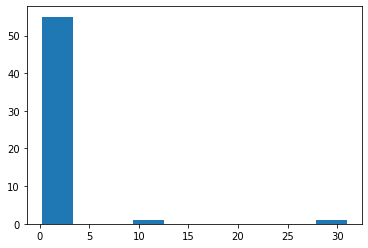

In [31]:
plt.hist(df1_pivot[12])

In [32]:
# dropping feature columns with more than 50% null values

# df1_pivot = df1_pivot.drop(columns = [5, 12, 53])

In [33]:
df3_pivot.head()

attribute_id,store_id,9,15,36,51
0,338,CO,Red Rock,ADVENTURE,CO-AURORA-579
1,339,UT,Red Rock,COUNTRY,UT-CEDAR CITY-244
2,340,UT,Canyon,ADVENTURE BTO,UT-SaltLake-539
3,341,AZ,Red Rock,ADVENTURE,AZ-SHOW LOW-388
4,342,OR,White Water,ADVENTURE,OR-BAKER CITY-439


In [34]:
df2_pivot.head()

attribute_id,store_id,28,35
0,338,4600.0,6993.0
1,339,2285.0,9078.0
2,340,5945.0,6993.0
3,341,4200.0,3703.0
4,342,4300.0,2442.0


In [35]:
df1_pivot.shape

(337, 48)

In [36]:
df1_pivot.head()

attribute_id,store_id,1,2,3,4,5,6,7,8,10,...,43,44,45,46,47,48,49,50,52,53
0,338,4860.41,0.2087,0.9293,0.1495,NaN,6.0,0.1455,4787174.31,4.3019,...,-104.7386,1.7362,78.8092,9.4235,0.0272,53186.0,0.3234,6.4630,5499.0,NaN
1,339,2546.26,0.4454,0.4954,0.2152,0.0147,5.0,0.2470,3868819.68,2.0088,...,-113.0741,3.0488,63.6985,1.0423,0.0460,22451.0,2.2360,3.3932,12718.0,NaN
2,340,2446.60,1.1300,1.0012,0.0001,NaN,22.0,0.1606,1624734.44,2.5842,...,-111.8870,8.9465,NaN,3.0910,0.1284,75574.0,1.2107,22.9760,137251.0,NaN
3,341,2526.21,0.1700,0.2454,0.2416,NaN,4.0,0.1906,13185248.22,1.7727,...,-110.0182,2.2278,77.9783,0.4614,0.0210,4118.0,3.3511,3.5039,3908.0,NaN
4,342,2368.64,0.0202,0.4319,0.2248,NaN,5.0,0.1988,7851917.14,2.4074,...,-117.8227,2.4932,71.6176,0.7586,0.0473,9886.0,1.1633,3.7059,5714.0,NaN


In [37]:
#
for col in df1_pivot.columns:
    df1_pivot[col] = df1_pivot[col].fillna(df1_pivot[col].mean())

# some features have a LOT of missing values. Need to remove them. This is TODO

In [38]:
df1_pivot.isnull().sum().sum()

0

In [39]:
store_w_features = df1_pivot.merge(df2_pivot).merge(df3_pivot).reset_index()

In [40]:
store_w_features.head(3)

attribute_id,index,store_id,1,2,3,4,5,6,7,8,...,49,50,52,53,28,35,9,15,36,51
0,0,338,4860.41,0.2087,0.9293,0.1495,0.028719,6.0,0.1455,4787174.31,...,0.3234,6.4630,5499.0,0.164589,4600.0,6993.0,CO,Red Rock,ADVENTURE,CO-AURORA-579
1,1,339,2546.26,0.4454,0.4954,0.2152,0.014700,5.0,0.2470,3868819.68,...,2.2360,3.3932,12718.0,0.164589,2285.0,9078.0,UT,Red Rock,COUNTRY,UT-CEDAR CITY-244
2,2,340,2446.60,1.1300,1.0012,0.0001,0.028719,22.0,0.1606,1624734.44,...,1.2107,22.9760,137251.0,0.164589,5945.0,6993.0,UT,Canyon,ADVENTURE BTO,UT-SaltLake-539


In [41]:
store_w_ohe_features = pd.get_dummies(store_w_features)

In [42]:
store_w_ohe_features.head(3)

,index,store_id,1,2,3,4,5,6,7,8,...,51_WY-POWELL-346,51_WY-RIVERTON-192,51_WY-RIVERTON-193,51_WY-SHERIDAN-135,51_WY-SHERIDAN-344,51_WY-THAYNE-276,51_WY-THERMOPOLIS-577,51_WY-TORRINGTON-293,51_WY-WHEATLAND-391,51_WY-WORLAND-166
0,0,338,4860.41,0.2087,0.9293,0.1495,0.028719,6.0,0.1455,4787174.31,...,0,0,0,0,0,0,0,0,0,0
1,1,339,2546.26,0.4454,0.4954,0.2152,0.014700,5.0,0.2470,3868819.68,...,0,0,0,0,0,0,0,0,0,0
2,2,340,2446.60,1.1300,1.0012,0.0001,0.028719,22.0,0.1606,1624734.44,...,0,0,0,0,0,0,0,0,0,0


In [43]:
store_w_ohe_features.iloc[:, 2:].head()
# to do: run kmeans on the above df
# identify the right cluster n


# in your presentation, talk about stratified sampling. But this data has challenges... you can talk about your EDA
# so, to make sense of the data that's given, you implemented your own variation of stratified sampling - but from using kmeans cluster




,1,2,3,4,5,6,7,8,10,11,...,51_WY-POWELL-346,51_WY-RIVERTON-192,51_WY-RIVERTON-193,51_WY-SHERIDAN-135,51_WY-SHERIDAN-344,51_WY-THAYNE-276,51_WY-THERMOPOLIS-577,51_WY-TORRINGTON-293,51_WY-WHEATLAND-391,51_WY-WORLAND-166
0,4860.41,0.2087,0.9293,0.1495,0.028719,6.0,0.1455,4787174.31,4.3019,8.4082,...,0,0,0,0,0,0,0,0,0,0
1,2546.26,0.4454,0.4954,0.2152,0.014700,5.0,0.2470,3868819.68,2.0088,1.0779,...,0,0,0,0,0,0,0,0,0,0
2,2446.60,1.1300,1.0012,0.0001,0.028719,22.0,0.1606,1624734.44,2.5842,5.6805,...,0,0,0,0,0,0,0,0,0,0
3,2526.21,0.1700,0.2454,0.2416,0.028719,4.0,0.1906,13185248.22,1.7727,1.5542,...,0,0,0,0,0,0,0,0,0,0
4,2368.64,0.0202,0.4319,0.2248,0.028719,5.0,0.1988,7851917.14,2.4074,0.8598,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = store_w_ohe_features.iloc[:,2:]

# kmeanModel.label_ < if I assign this to new column in the df i can get label 

Text(0, 0.5, 'Distortion (SSE)')

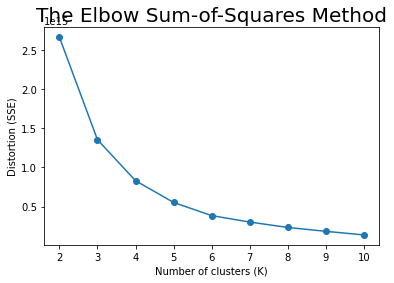

In [45]:
ss = []                            # list of sum of square error for each K value
assignments = {}

Krange= list(range(2, 11))         # K values

for K in Krange:
    model = KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(model.inertia_) # or ss.append(model.inertia_) ( same thing)
    assignments[str(K)] = assigned_cluster
    
plt.plot(Krange, ss, '-o')

plt.title("The Elbow Sum-of-Squares Method", size = 20)
plt.xlabel("Number of clusters (K)")
plt.ylabel("Distortion (SSE)")


4


([<matplotlib.axis.XTick at 0x7fe104885f40>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

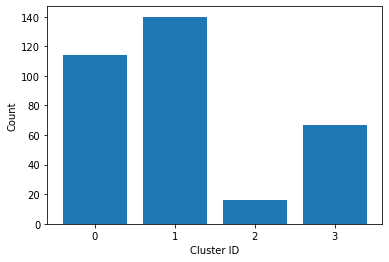

In [46]:
# Based on the graph, the elbow point is either 4 or 5.
best_K = 4
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

plt.bar(range(best_K), counts, align='center')

plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

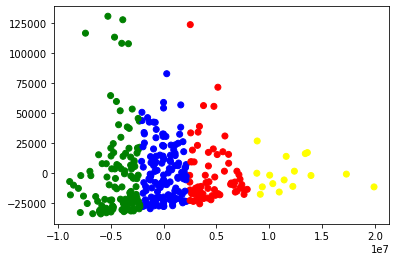

In [109]:
import sklearn.decomposition
import matplotlib.colors

model = KMeans(n_clusters=4)

cluster_assignments = model.fit_predict(X)

cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue','yellow'])

pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

In [48]:
model = KMeans(n_clusters=4)
assigned_cluster = model.fit_predict(X)

In [49]:
len(assigned_cluster)

337

In [50]:
store_w_ohe_features['cluster']=assigned_cluster

In [51]:
store_w_ohe_features.head()

,index,store_id,1,2,3,4,5,6,7,8,...,51_WY-RIVERTON-192,51_WY-RIVERTON-193,51_WY-SHERIDAN-135,51_WY-SHERIDAN-344,51_WY-THAYNE-276,51_WY-THERMOPOLIS-577,51_WY-TORRINGTON-293,51_WY-WHEATLAND-391,51_WY-WORLAND-166,cluster
0,0,338,4860.41,0.2087,0.9293,0.1495,0.028719,6.0,0.1455,4787174.31,...,0,0,0,0,0,0,0,0,0,1
1,1,339,2546.26,0.4454,0.4954,0.2152,0.014700,5.0,0.2470,3868819.68,...,0,0,0,0,0,0,0,0,0,1
2,2,340,2446.60,1.1300,1.0012,0.0001,0.028719,22.0,0.1606,1624734.44,...,0,0,0,0,0,0,0,0,0,1
3,3,341,2526.21,0.1700,0.2454,0.2416,0.028719,4.0,0.1906,13185248.22,...,0,0,0,0,0,0,0,0,0,0
4,4,342,2368.64,0.0202,0.4319,0.2248,0.028719,5.0,0.1988,7851917.14,...,0,0,0,0,0,0,0,0,0,3


In [52]:
store_0 = store_w_ohe_features[store_w_ohe_features.cluster==0]
store_1 = store_w_ohe_features[store_w_ohe_features.cluster==1]
store_2 = store_w_ohe_features[store_w_ohe_features.cluster==2]
store_3 = store_w_ohe_features[store_w_ohe_features.cluster==3]

In [53]:
store_0.head()

,index,store_id,1,2,3,4,5,6,7,8,...,51_WY-RIVERTON-192,51_WY-RIVERTON-193,51_WY-SHERIDAN-135,51_WY-SHERIDAN-344,51_WY-THAYNE-276,51_WY-THERMOPOLIS-577,51_WY-TORRINGTON-293,51_WY-WHEATLAND-391,51_WY-WORLAND-166,cluster
3,3,341,2526.21,0.1700,0.2454,0.2416,0.028719,4.0,0.1906,13185248.22,...,0,0,0,0,0,0,0,0,0,0
15,15,353,2942.13,0.1701,0.5356,0.1971,0.028719,7.0,0.2314,11904062.55,...,0,0,0,0,0,0,0,0,0,0
18,18,356,2290.46,0.3616,0.2983,0.1175,0.028719,1.0,0.1970,11691256.28,...,0,0,0,0,0,0,0,0,0,0
22,22,361,2912.36,0.1619,0.3582,0.1499,0.028719,1.0,0.1879,16247605.00,...,0,0,0,0,0,0,0,0,0,0
23,23,362,3078.46,1.2466,0.2137,0.1672,0.028719,1.0,0.2207,12430141.42,...,0,0,0,0,0,0,0,0,0,0


In [55]:
len(store_0), len(store_1), len(store_2), len(store_3)

(67, 114, 16, 140)

In [90]:
store0_split = store_0.sample(frac=0.9,random_state=200)

store0_2_split=store_0.drop(store0_split.index)

In [91]:
store1_split = store_1.sample(frac=0.9,random_state=200)

store1_2_split=store_1.drop(store1_split.index)

In [92]:
store2_split = store_2.sample(frac=0.9,random_state=200)

store2_2_split=store_2.drop(store2_split.index)

In [93]:
store3_split = store_3.sample(frac=0.9,random_state=200)

store3_2_split=store_3.drop(store3_split.index)

In [94]:
len(store0_split)

60

In [95]:
len(store0_2_split)

7

In [96]:
control = pd.concat([store0_split.store_id, store1_split.store_id, store2_split.store_id, store3_split.store_id], axis=0)



In [97]:
treatment = pd.concat([store0_2_split.store_id, store1_2_split.store_id, store2_2_split.store_id, store3_2_split.store_id], axis=0)


In [98]:
control.shape

(303,)

In [99]:
treatment.shape

(34,)

In [102]:
337*0.9

303.3

In [103]:
337*0.1

33.7

In [104]:
control.head()

124    463
295    634
24     363
280    619
37     376
Name: store_id, dtype: int64

In [105]:
treatment.head(34)

47     386
58     397
62     401
102    441
106    445
171    510
291    630
30     369
41     380
83     422
138    477
166    505
204    543
222    561
226    565
268    607
274    613
315    654
253    592
256    595
7      345
26     365
46     385
51     390
67     406
104    443
133    472
170    509
187    526
193    532
220    559
255    594
301    640
316    655
Name: store_id, dtype: int64